# Charge Time Machine Learning Algorithm Generation

## Splitting the data

In [1]:
import pandas as pd
import datetime as td
import  numpy as np
import datetime 
import datetime as dt
df = pd.read_csv('data/chargeML.csv')
df=df._convert(numeric=True)
df=df.dropna()
#df['date2'] =  pd.to_datetime(df['date2'])
#df.index.to_pydatetime() 
#df=df.date2.to_pydatetime() 
df['date2']=pd.to_datetime(df.date2)
#df['date2'] =  pd.to_datetime(df['date2'])
df["dayInMonth"] =df['date2'].dt.day
inData=dataSet=df

In [2]:
## Need to add a cos function for day of week
import math as ma
df["cos_week"] = np.cos(df["dayOfWeek"]/7*2*ma.pi)
df["sin_hour"]=np.sin(df["dayOfWeek"]/7*2*ma.pi)

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

splitOption = 1 # split per day of the month

#cutOffTestDate=2022.01.01
cutOffTestDate = datetime.datetime(2022, 1, 1)
testSet = dataSet.loc[(inData.date2 > cutOffTestDate), :]
mainSet = dataSet.loc[(inData.date2 <= cutOffTestDate), :]


In [4]:
trainSet = dataSet.loc[(dataSet.dayInMonth > 0) & (dataSet.dayInMonth < 23), :]
validSet = dataSet.loc[(dataSet.dayInMonth >= 23) & (inData.date2 <= cutOffTestDate), :]

### Doing "Data Windowing"

In [5]:
'''def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window'''

"def split_window(self, features):\n  inputs = features[:, self.input_slice, :]\n  labels = features[:, self.labels_slice, :]\n  if self.label_columns is not None:\n    labels = tf.stack(\n        [labels[:, :, self.column_indices[name]] for name in self.label_columns],\n        axis=-1)\n\n  # Slicing doesn't preserve static shape information, so set the shapes\n  # manually. This way the `tf.data.Datasets` are easier to inspect.\n  inputs.set_shape([None, self.input_width, None])\n  labels.set_shape([None, self.label_width, None])\n\n  return inputs, labels\n\nWindowGenerator.split_window = split_window"

In [6]:
# Above isn't used, I don't think it needs to be

### Normalising the data

In [7]:
trainDate=trainSet.date2
validDate=validSet.date2
testDate=testSet.date2

In [8]:
trainSet=trainSet.drop('date2',1)
validSet=validSet.drop('date2',1)
testSet=testSet.drop('date2',1)
trainSet=trainSet.drop('dayInMonth',1)
validSet=validSet.drop('dayInMonth',1)
testSet=testSet.drop('dayInMonth',1)
trainSet=trainSet.drop('dayOfWeek',1)
validSet=validSet.drop('dayOfWeek',1)
testSet=testSet.drop('dayOfWeek',1)
trainSet=trainSet.drop('dayOfYear',1)
validSet=validSet.drop('dayOfYear',1)
testSet=testSet.drop('dayOfYear',1)
trainSet=trainSet.drop('hour',1)
validSet=validSet.drop('hour',1)
testSet=testSet.drop('hour',1)

/tmp/ipykernel_457426/1176180537.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainSet=trainSet.drop('date2',1)
/tmp/ipykernel_457426/1176180537.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  validSet=validSet.drop('date2',1)
/tmp/ipykernel_457426/1176180537.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  testSet=testSet.drop('date2',1)
/tmp/ipykernel_457426/1176180537.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainSet=trainSet.drop('dayInMonth',1)
/tmp/ipykernel_457426/1176180537.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

In [9]:
usedColsForecast=['dub_temp','dub_wddir','dub_wdsp']

In [10]:
train_mean = trainSet.mean()
train_std = trainSet.std()



In [11]:
usedColsForecast

['dub_temp', 'dub_wddir', 'dub_wdsp']

In [12]:
train_meanSave=train_mean[usedColsForecast]
train_stdSave =train_std[usedColsForecast]
np.savetxt("./models/train_meanSave.csv", train_meanSave, delimiter=",")
np.savetxt("./models/train_stdSave.csv", train_meanSave, delimiter=",")

In [13]:
train_df = (trainSet - train_mean) / train_std
val_df = (validSet - train_mean) / train_std
test_df = (testSet - train_mean) / train_std

In [14]:
train_mean['ActualGenerationMW']
train_std['ActualGenerationMW']

876.8203591605138

In [15]:
#re-creating date-column
train_df['date2']=trainDate
val_df['date2']=validDate
test_df['date2']=testDate

# Re-adding removed columns
train_df['hour']=train_df['date2'].dt.hour
train_df['dayOfWeek']=train_df['date2'].dt.day_of_week
train_df['dayOfYear']=train_df['date2'].dt.day_of_year
train_df["dayInMonth"] =train_df['date2'].dt.day
# Re-adding removed columns
val_df['hour']=val_df['date2'].dt.hour
val_df['dayOfWeek']=val_df['date2'].dt.day_of_week
val_df['dayOfYear']=val_df['date2'].dt.day_of_year
val_df["dayInMonth"] =val_df['date2'].dt.day
# Re-adding removed columns
test_df['hour']=test_df['date2'].dt.hour
test_df['dayOfWeek']=test_df['date2'].dt.day_of_week
test_df['dayOfYear']=test_df['date2'].dt.day_of_year
test_df["dayInMonth"] =test_df['date2'].dt.day

#Resetting the Actual Generation to be non-continuous
train_df['ActualGenerationMW']=train_df['ActualGenerationMW']*train_std['ActualGenerationMW']+train_mean['ActualGenerationMW']
val_df['ActualGenerationMW']=val_df['ActualGenerationMW']*train_std['ActualGenerationMW']+train_mean['ActualGenerationMW']
test_df['ActualGenerationMW']=test_df['ActualGenerationMW']*train_std['ActualGenerationMW']+train_mean['ActualGenerationMW']
# Re-setting the names of the columns
trainSet=train_df
validSet=val_df
testSet=test_df

In [16]:
'''
if (splitOption == 0):  # Standard SkLearn train test split, usually not good for time series

elif (splitOption == 1):  # split before / after day of the month
  dataSet["dayInMonth"] = 0

  def setDayInMonth(row):
      row["dayInMonth"] = row.date.day
      return row

  dataSet = dataSet.apply(setDayInMonth, axis=1)

  trainSet = dataSet.loc[(dataSet.dayInMonth > 0) & (dataSet.dayInMonth < 23), :]
  validSet = dataSet.loc[(dataSet.dayInMonth >= 23) & (inData.date <= cutOffTestDate), :]
elif (splitOption == 2):  # split per period
  trainSet = dataSet.loc[(inData.date <= cutOffValidationDate), :]
  validSet = dataSet.loc[(inData.date > cutOffValidationDate), :]  
  '''

'\nif (splitOption == 0):  # Standard SkLearn train test split, usually not good for time series\n\nelif (splitOption == 1):  # split before / after day of the month\n  dataSet["dayInMonth"] = 0\n\n  def setDayInMonth(row):\n      row["dayInMonth"] = row.date.day\n      return row\n\n  dataSet = dataSet.apply(setDayInMonth, axis=1)\n\n  trainSet = dataSet.loc[(dataSet.dayInMonth > 0) & (dataSet.dayInMonth < 23), :]\n  validSet = dataSet.loc[(dataSet.dayInMonth >= 23) & (inData.date <= cutOffTestDate), :]\nelif (splitOption == 2):  # split per period\n  trainSet = dataSet.loc[(inData.date <= cutOffValidationDate), :]\n  validSet = dataSet.loc[(inData.date > cutOffValidationDate), :]  \n  '

In [17]:
y_train = trainSet.ActualGenerationMW
y_valid = validSet.ActualGenerationMW
y_test = testSet.ActualGenerationMW	

In [18]:
X_train = trainSet
X_valid = validSet 

## Random forest generation

### Choosing Columns

In [19]:
#Version 1; Causing failures on kernel for ? reason
X_train1 = X_train[['ForecastWind','dayOfWeek','dub_msl','hour','dub_wddir',]]
X_valid1 = X_valid[['ForecastWind','dayOfWeek','dub_msl','hour','dub_wddir']]

In [20]:
#Version 1; Causing failures on kernel for ? reason
X_train1 = X_train[['ForecastWind','sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl']]
X_valid1 = X_valid[['ForecastWind','sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl']]

In [21]:
'''print(X_train['ForecastWind'].isnull().values.any())
print(X_train['dayOfWeek'].isnull().values.any())
print(X_train['dub_msl'].isnull().values.any())
print(X_train['hour'].isnull().values.any())
print(X_train['don_wddir'].isnull().values.any())
print(X_train['dub_wddir'].isnull().values.any())'''

"print(X_train['ForecastWind'].isnull().values.any())\nprint(X_train['dayOfWeek'].isnull().values.any())\nprint(X_train['dub_msl'].isnull().values.any())\nprint(X_train['hour'].isnull().values.any())\nprint(X_train['don_wddir'].isnull().values.any())\nprint(X_train['dub_wddir'].isnull().values.any())"

In [22]:
'''#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train1,y_train)'''

'#Import Random Forest Model\nfrom sklearn.ensemble import RandomForestClassifier\n\n#Create a Gaussian Classifier\nclf=RandomForestClassifier(n_estimators=10)\n\n#Train the model using the training sets y_pred=clf.predict(X_test)\nclf.fit(X_train1,y_train)'

In [23]:
'''
#Import Random Forest "Classifier" Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
#clf=RandomForestClassifier(n_estimators=50,random_state = 42, max_depth=50, max_leaf_nodes=30)
clf=RandomForestClassifier(n_estimators=100,random_state = 42, max_depth=100, max_leaf_nodes=100)
#clf=RandomForestClassifier(n_estimators=100,random_state = 43)
print(clf.get_params())
#Train the model using the training sets y_pred=clf.predict(X_test)

# Training the model
clf.fit(X_train1,y_train)

#Returning predicted data
y_pred=clf.predict(X_valid1)

#Using test for training data will run into issues

#X_test1 = X_test[['ForecastWind','dayOfWeek','dub_msl','hour','dub_wddir']]
#y_testpred=clf.predict(X_test1)


# Plotting last week of data
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.plot(X_valid['date2'][-7*24:],y_pred[-7*24:],color = 'blue')
plt.plot(X_valid['date2'][-7*24:],y_valid[-7*24:],color = 'red')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))'''

'\n#Import Random Forest "Classifier" Model\nfrom sklearn.ensemble import RandomForestClassifier\n\n#Create a Gaussian Classifier\n#clf=RandomForestClassifier(n_estimators=50,random_state = 42, max_depth=50, max_leaf_nodes=30)\nclf=RandomForestClassifier(n_estimators=100,random_state = 42, max_depth=100, max_leaf_nodes=100)\n#clf=RandomForestClassifier(n_estimators=100,random_state = 43)\nprint(clf.get_params())\n#Train the model using the training sets y_pred=clf.predict(X_test)\n\n# Training the model\nclf.fit(X_train1,y_train)\n\n#Returning predicted data\ny_pred=clf.predict(X_valid1)\n\n#Using test for training data will run into issues\n\n#X_test1 = X_test[[\'ForecastWind\',\'dayOfWeek\',\'dub_msl\',\'hour\',\'dub_wddir\']]\n#y_testpred=clf.predict(X_test1)\n\n\n# Plotting last week of data\nimport matplotlib.pyplot as plt \nfrom matplotlib.pyplot import figure\n\nplt.plot(X_valid[\'date2\'][-7*24:],y_pred[-7*24:],color = \'blue\')\nplt.plot(X_valid[\'date2\'][-7*24:],y_valid[-7*2


### Example Baselines 

clf=RandomForestClassifier(n_estimators=50,random_state = 42, max_depth=50, max_leaf_nodes=30)

Using  [['ForecastWind','sin_day','sin_hour']]
Mean Absolute Error: 574.4672045420589
Mean Squared Error: 532948.2448827133
Root Mean Squared Error: 730.0330436923477



clf=RandomForestClassifier(n_estimators=50,random_state = 42, max_depth=50, max_leaf_nodes=30)

Using [['ForecastWind','sin_day','sin_hour','dub_wddir','dub_wdsp','dub_msl']]
Mean Absolute Error: 594.1552368145824
Mean Squared Error: 585698.313312416
Root Mean Squared Error: 765.3092925820357


### Reggresion model

In [24]:
from sklearn.ensemble import RandomForestRegressor

#rrf=RandomForestRegressor(n_estimators=100,random_state = 42, max_depth=100, max_leaf_nodes=100)
rrf=RandomForestRegressor(n_estimators=100,random_state = 42)

#clf=RandomForestClassifier(n_estimators=100,random_state = 43)
#print(clf.get_params())
#Train the model using the training sets y_pred=clf.predict(X_test

In [25]:
rrf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [26]:
rrf.fit(X_train1,y_train)

RandomForestRegressor(random_state=42)

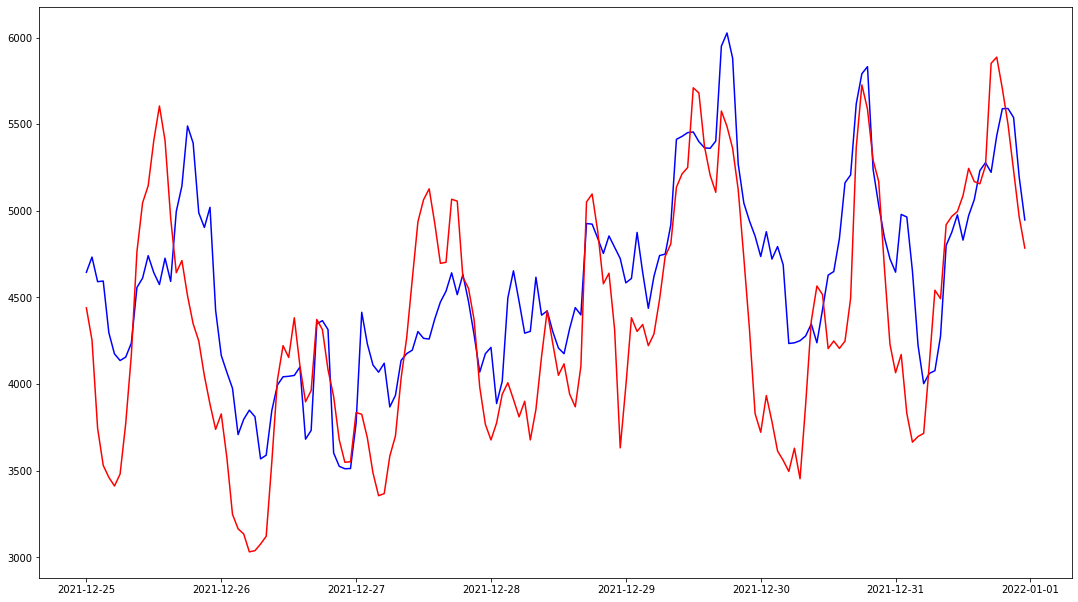

In [27]:
y_pred=rrf.predict(X_valid1)
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.plot(X_valid['date2'][-7*24:],y_pred[-7*24:],color = 'blue')
plt.plot(X_valid['date2'][-7*24:],y_valid[-7*24:],color = 'red')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

In [28]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

Mean Absolute Error: 481.1981891528463
Mean Squared Error: 363681.65168292244
Root Mean Squared Error: 603.0602388509149


<BarContainer object of 8 artists>

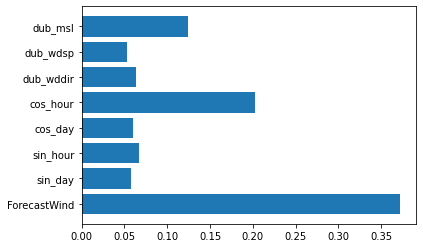

In [29]:
plt.barh(X_valid1.columns, rrf.feature_importances_)

This:-
rrf=RandomForestRegressor(n_estimators=100,random_state = 42, max_depth=100, max_leaf_nodes=100)

Yields this:-
Mean Absolute Error: 465.79800324008335
Mean Squared Error: 332345.30211887945
Root Mean Squared Error: 576.4939740525302

This:-
rrf=RandomForestRegressor(n_estimators=100,random_state = 42, max_depth=100, max_leaf_nodes=100)

Yields this:-
Mean Absolute Error: 479.4909188704617
Mean Squared Error: 362932.07708576124
Root Mean Squared Error: 602.438442569663

## Using Tenserflow

In [30]:
import tensorflow_decision_forests as tfdf


2022-07-16 10:06:04.861888: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-16 10:06:04.861970: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [31]:
trainSetTF=trainSet
validSetTF=validSet
testSetTF=testSet

In [32]:
#Dropping time from the train and test columns
trainSetTF=trainSetTF.drop('date2',1)
validSetTF=validSetTF.drop('date2',1)
testSetTF=testSetTF.drop('date2',1)
trainSetTF=trainSetTF.drop('dayInMonth',1)
validSetTF=validSetTF.drop('dayInMonth',1)
testSetTF=testSetTF.drop('dayInMonth',1)
trainSetTF=trainSetTF.drop('dayOfWeek',1)
validSetTF=validSetTF.drop('dayOfWeek',1)
testSetTF=testSetTF.drop('dayOfWeek',1)
trainSetTF=trainSetTF.drop('dayOfYear',1)
validSetTF=validSetTF.drop('dayOfYear',1)
testSetTF=testSetTF.drop('dayOfYear',1)
trainSetTF=trainSetTF.drop('hour',1)
validSetTF=validSetTF.drop('hour',1)
testSetTF=testSetTF.drop('hour',1)

/tmp/ipykernel_457426/4217556139.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainSetTF=trainSetTF.drop('date2',1)
/tmp/ipykernel_457426/4217556139.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  validSetTF=validSetTF.drop('date2',1)
/tmp/ipykernel_457426/4217556139.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  testSetTF=testSetTF.drop('date2',1)
/tmp/ipykernel_457426/4217556139.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainSetTF=trainSetTF.drop('dayInMonth',1)
/tmp/ipykernel_457426/4217556139.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will

In [33]:

'''
trainSetTF = tfdf.keras.pd_dataframe_to_tf_dataset(trainSetTF, label=label, task=tfdf.keras.Task.REGRESSION)
testSetTF = tfdf.keras.pd_dataframe_to_tf_dataset(testSetTF, label=label, task=tfdf.keras.Task.REGRESSION)
'''

'\ntrainSetTF = tfdf.keras.pd_dataframe_to_tf_dataset(trainSetTF, label=label, task=tfdf.keras.Task.REGRESSION)\ntestSetTF = tfdf.keras.pd_dataframe_to_tf_dataset(testSetTF, label=label, task=tfdf.keras.Task.REGRESSION)\n'

In [34]:

y_trainTF = trainSetTF.ActualGenerationMW
y_validTF = validSetTF.ActualGenerationMW
y_testTF = testSetTF.ActualGenerationMW

#Version 1; Causing failures on kernel for ? reason
X_trainTF = trainSetTF[['ForecastWind','sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl','ActualGenerationMW']]
X_validTF = validSetTF[['ForecastWind','sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl','ActualGenerationMW']]


In [35]:
# Running into difficulty converting these columns, so I reset the value of X_train to include ActualGenerationMW
label = "ActualGenerationMW"
'''
y_trainTF = tfdf.keras.pd_dataframe_to_tf_dataset(y_trainTF, label=label, task=tfdf.keras.Task.REGRESSION)
y_validTF = tfdf.keras.pd_dataframe_to_tf_dataset(y_validTF, label=label, task=tfdf.keras.Task.REGRESSION)
y_testTF = tfdf.keras.pd_dataframe_to_tf_dataset(y_testTF, label=label, task=tfdf.keras.Task.REGRESSION)
'''

X_trainTF = tfdf.keras.pd_dataframe_to_tf_dataset(X_trainTF, label=label, task=tfdf.keras.Task.REGRESSION)

X_validTF = tfdf.keras.pd_dataframe_to_tf_dataset(X_validTF, label=label, task=tfdf.keras.Task.REGRESSION)

/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py:2542: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features_dataframe = dataframe.drop(label, 1)
2022-07-16 10:06:08.361347: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-16 10:06:08.361404: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-16 10:06:08.361442: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (x20217366): /proc/driver/nvidia/version does not exist
/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py:2542: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except

In [36]:
#Using keras
model_7 = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

# Train the model.
model_7.fit(x=X_trainTF)

Use /tmp/tmpq9lkubx6 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:09.390569. Found 20032 examples.
Training model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmpq9lkubx6/model/ with prefix 224e38e71a574d3f
[INFO abstract_model.cc:1246] Engine "RandomForestOptPred" built
[INFO kernel.cc:1022] Use fast generic engine


Model trained in 0:00:17.483643
Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [37]:
# Not sure what test_ds should be
'''
import math
# Evaluate the model on the test dataset.
model_7.compile(metrics=["mse"])
evaluation = model_7.evaluate(test_ds, return_dict=True)

print(evaluation)
print()
print(f"MSE: {evaluation['mse']}")
print(f"RMSE: {math.sqrt(evaluation['mse'])}")'''

'\nimport math\n# Evaluate the model on the test dataset.\nmodel_7.compile(metrics=["mse"])\nevaluation = model_7.evaluate(test_ds, return_dict=True)\n\nprint(evaluation)\nprint()\nprint(f"MSE: {evaluation[\'mse\']}")\nprint(f"RMSE: {math.sqrt(evaluation[\'mse\'])}")'

In [38]:
# Not sure why, but this is
'''y_pred=model_7.predict(X_valid1)
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.plot(X_valid['date2'][-7*24:],y_pred[-7*24:],color = 'blue')
plt.plot(X_valid['date2'][-7*24:],y_valid[-7*24:],color = 'red')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)'''

"y_pred=model_7.predict(X_valid1)\nimport matplotlib.pyplot as plt \nfrom matplotlib.pyplot import figure\n\nplt.plot(X_valid['date2'][-7*24:],y_pred[-7*24:],color = 'blue')\nplt.plot(X_valid['date2'][-7*24:],y_valid[-7*24:],color = 'red')\nfig = plt.gcf()\nfig.set_size_inches(18.5, 10.5)\nfig.savefig('test2png.png', dpi=100)"

In [39]:
### Another TF model

using_col_list = ['ForecastWind','sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_msl','ActualGenerationMW']
using_col_list.remove('ActualGenerationMW')
feature_list = []
for col in using_col_list:
    feature_list.append(tfdf.keras.FeatureUsage(name=col,semantic=tfdf.keras.FeatureSemantic.NUMERICAL))


model8 = tfdf.keras.RandomForestModel(features = feature_list, task = tfdf.keras.Task.REGRESSION,
    exclude_non_specified_features=True,
    num_trees=1000, max_depth=16,
    split_axis="SPARSE_OBLIQUE",categorical_algorithm="RANDOM",
    missing_value_policy='RANDOM_LOCAL_IMPUTATION',
    sparse_oblique_normalization='STANDARD_DEVIATION',
    compute_oob_variable_importances=True,
    winner_take_all=False)
                                                

#model8.compile(metrics=["Accuracy"])


Use /tmp/tmpx84ntkn2 as temporary training directory


In [40]:
from wurlitzer import sys_pipes
with sys_pipes():
    model8.fit(X_trainTF)

Reading training dataset...
Training dataset read in 0:00:00.656172. Found 20032 examples.
Training model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmpx84ntkn2/model/ with prefix 14892f26c0614748
[INFO abstract_model.cc:1246] Engine "RandomForestGeneric" built
[INFO kernel.cc:1022] Use fast generic engine


Model trained in 0:08:37.339637
Compiling model...
Model compiled.


In [41]:
# Not sure what test_ds should be
'''
# Evaluate the model on the test dataset.
model8.compile(metrics=["mse"])
evaluation = model8.evaluate(test_ds, return_dict=True)

print(evaluation)
print()
print(f"MSE: {evaluation['mse']}")
print(f"RMSE: {math.sqrt(evaluation['mse'])}")
#print(f"MAE: {evaluation['mae']}")
'''

'\n# Evaluate the model on the test dataset.\nmodel8.compile(metrics=["mse"])\nevaluation = model8.evaluate(test_ds, return_dict=True)\n\nprint(evaluation)\nprint()\nprint(f"MSE: {evaluation[\'mse\']}")\nprint(f"RMSE: {math.sqrt(evaluation[\'mse\'])}")\n#print(f"MAE: {evaluation[\'mae\']}")\n'

Not sure if I'll get much better then above

## Tenserflow Setup

In [42]:
train_df

,ActualGenerationMW,ForecastWind,ActualWind,ActualDemand,ker_temp,dub_temp,dub_wddir,don_wddir,dub_wdsp,may_wdsp,...,cos_day,sin_wind,cos_wind,totalImbalance,cos_week,date2,hour,dayOfWeek,dayOfYear,dayInMonth
0,2681.0,-1.047933,-0.835824,-1.026788,-1.258304,-0.297889,-1.364822,-0.575891,-1.005216,-0.776282,...,1.327940,0.942094,-1.679746,-1.430845,1.412591,2019-04-01 00:00:00,0,0,91,1
1,2696.0,-1.074345,-0.915625,-1.200459,-1.701154,-0.278044,-1.103840,-0.575891,-1.005216,-0.587556,...,1.327940,1.391258,-1.332510,-1.128395,1.412591,2019-04-01 01:00:00,1,0,91,1
2,2834.0,-1.090027,-1.007630,-1.354315,-1.649054,-0.238355,-0.842857,-0.689865,-1.180783,-0.587556,...,1.327940,1.649972,-0.894532,-0.630459,1.412591,2019-04-01 02:00:00,2,0,91,1
3,2886.0,-1.087551,-1.035794,-1.442899,-1.935604,-0.317733,-0.059911,-0.689865,-1.005216,-0.587556,...,1.327940,1.105585,0.419641,-0.394400,1.412591,2019-04-01 03:00:00,3,0,91,1
4,2891.0,-1.064441,-1.035794,-1.500012,-2.039804,-0.436801,1.636475,-0.575891,-1.356350,-0.965009,...,1.327940,-2.072596,-0.502609,-0.294813,1.412591,2019-04-01 04:00:00,4,0,91,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27489,4992.0,0.002757,0.405306,-0.073346,0.174446,0.555426,0.331563,0.563851,-0.302948,-0.021377,...,0.828188,0.244664,0.755802,1.322558,0.879520,2022-05-22 20:00:00,20,6,142,22
27490,4659.0,-0.215964,0.131169,-0.209718,0.122346,0.436359,0.462054,0.563851,-0.302948,-0.021377,...,0.828188,-0.081019,0.790091,0.924209,0.879520,2022-05-22 21:00:00,21,6,142,22
27491,4339.0,-0.374435,-0.115743,-0.279653,0.148396,0.218069,0.462054,0.221929,0.048186,-0.587556,...,0.828188,-0.081019,0.790091,0.444715,0.879520,2022-05-22 22:00:00,22,6,142,22
27492,3757.0,-0.381038,-0.111988,-0.677115,0.122346,0.059313,0.592545,0.107955,0.399320,-0.210103,...,0.828188,-0.409943,0.782745,0.000261,0.879520,2022-05-22 23:00:00,23,6,142,22


In [43]:
usedCols=['sin_day','sin_hour','cos_day','cos_hour','dub_wddir','dub_wdsp','dub_temp','ActualGenerationMW']
train_df3 = train_df[usedCols]
val_df3 = val_df[usedCols]
test_df3 = test_df[usedCols]

In [44]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df3 = train_df3
    self.val_df3 = val_df3
    self.test_df3 = test_df3

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df3.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])



In [45]:
val_df3

,sin_day,sin_hour,cos_day,cos_hour,dub_wddir,dub_wdsp,dub_temp,ActualGenerationMW
528,1.231230,1.103801,1.231230,0.000242,-0.451384,-1.180783,0.356981,2829.0
529,1.231230,1.103801,1.231230,0.366281,2.027948,-1.180783,0.456203,2898.0
530,1.231230,1.103801,1.231230,0.707376,-2.408751,-1.356350,0.277602,2894.0
531,1.231230,1.103801,1.231230,1.000280,-1.886787,-1.180783,0.099002,2803.0
532,1.231230,1.103801,1.231230,1.225033,-1.364822,-1.005216,0.118846,2775.0
...,...,...,...,...,...,...,...,...
24081,-0.068253,-0.613456,-0.068253,-1.365834,0.070581,0.926022,0.575270,5705.0
24082,-0.068253,-0.613456,-0.068253,-1.224548,-0.059911,0.574888,0.595115,5501.0
24083,-0.068253,-0.613456,-0.068253,-0.999795,-0.190402,0.750455,0.773716,5235.0
24084,-0.068253,-0.613456,-0.068253,-0.706891,-0.190402,1.452723,0.753871,4964.0


In [46]:
@property
def train(self):
  return self.make_dataset(self.train_df3)

@property
def val(self):
  return self.make_dataset(self.val_df3)

@property
def test(self):
  return self.make_dataset(self.test_df3)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example



In [47]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [48]:
def plot(self, model=None, plot_col='ActualGenerationMW', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot


# Baseline Model

In [49]:
import tensorflow as tf

In [50]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['ActualGenerationMW'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['ActualGenerationMW']

In [51]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [52]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

baseline = Baseline(label_index=column_indices['ActualGenerationMW'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

210/210 [==============================] - 2s 6ms/step - loss: 18385686.0000 - mean_absolute_error: 4205.3296


In [53]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['ActualGenerationMW'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['ActualGenerationMW']

Input shape: (32, 24, 8)
Output shape: (32, 24, 1)


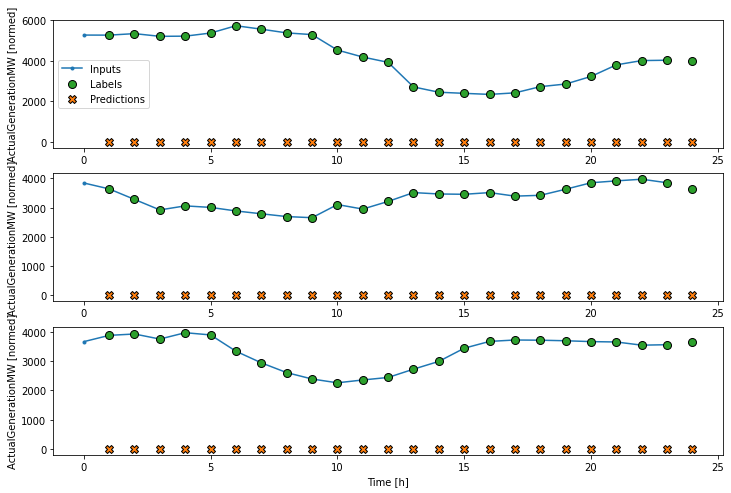

In [54]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)
wide_window.plot(baseline)

## Convolutional Neural Network


In [55]:
'''# I think this could be important,
# If convulutional width is set to 3, then given 3 hours of inputs it predicts 1 hour into the future
# We want for 
CONV_WIDTH = 3

conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['ActualGenerationMW'])

conv_window'''

"# I think this could be important,\n# If convulutional width is set to 3, then given 3 hours of inputs it predicts 1 hour into the future\n# We want for \nCONV_WIDTH = 3\n\nconv_window = WindowGenerator(\n    input_width=CONV_WIDTH,\n    label_width=1,\n    shift=1,\n    label_columns=['ActualGenerationMW'])\n\nconv_window"

In [56]:
'''conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])'''

"conv_model = tf.keras.Sequential([\n    tf.keras.layers.Conv1D(filters=32,\n                           kernel_size=(CONV_WIDTH,),\n                           activation='relu'),\n    tf.keras.layers.Dense(units=32, activation='relu'),\n    tf.keras.layers.Dense(units=1),\n])"

## Artificial Neural Networks

In [57]:
import tensorflow as tf
ann = tf.keras.models.Sequential([            
          tf.keras.layers.Dense(units=111, activation='relu', name="Layer_1"),
          tf.keras.layers.Dropout(0.1), #drop-out layer to avoid overfit
          tf.keras.layers.Dense(units=111, activation='relu', name="Layer_2"),
          tf.keras.layers.Dropout(0.1),
          tf.keras.layers.Dense(units=111, activation='relu', name="Layer_3"),
          tf.keras.layers.Dropout(0.1),
          tf.keras.layers.Dense(units=10, activation='relu', name="Layer_4"),
          tf.keras.layers.Dense(units=1, name="output_layer")
          ])

ann.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
            optimizer=tf.keras.optimizers.Adam(lr=0.00002),
            metrics=["mae"])

/home/ubuntu/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [58]:
#copying stuff from document...
epochs=60
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

#sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
ann.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
            optimizer=tf.keras.optimizers.Adam(lr=0.00002),
            metrics=["mae"])

In [59]:
ann.fit(X_train1,y_train, batch_size=200, epochs=20)

Epoch 1/20
101/101 [==============================] - 2s 7ms/step - loss: 4337.7036 - mae: 4337.7036
Epoch 2/20
101/101 [==============================] - 1s 7ms/step - loss: 4337.3457 - mae: 4337.3457
Epoch 3/20
101/101 [==============================] - 1s 7ms/step - loss: 4336.8979 - mae: 4336.8979
Epoch 4/20
101/101 [==============================] - 1s 7ms/step - loss: 4336.2471 - mae: 4336.2471
Epoch 5/20
101/101 [==============================] - 1s 7ms/step - loss: 4335.1646 - mae: 4335.1646
Epoch 6/20
101/101 [==============================] - 1s 7ms/step - loss: 4333.5029 - mae: 4333.5029
Epoch 7/20
101/101 [==============================] - 1s 7ms/step - loss: 4331.1323 - mae: 4331.1323
Epoch 8/20
101/101 [==============================] - 1s 7ms/step - loss: 4327.7285 - mae: 4327.7280
Epoch 9/20
101/101 [==============================] - 1s 7ms/step - loss: 4322.9321 - mae: 4322.9316
Epoch 10/20
101/101 [==============================] - 1s 7ms/step - loss: 4316.4019 - mae:

In [60]:
y_pred=ann.predict(X_valid1)

210/210 [==============================] - 1s 2ms/step


In [61]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

Mean Absolute Error: 3913.440762886744
Mean Squared Error: 16013664.485378796
Root Mean Squared Error: 4001.7076961440844


For lr=0.002 and  batch_size=200, epochs=100)

Mean Absolute Error: 470.42779251935326
Mean Squared Error: 353878.8971401352
Root Mean Squared Error: 594.877211817813

For lr=0.0002 and  batch_size=200, epochs=100)
Mean Absolute Error: 478.03476671201486
Mean Squared Error: 364369.589799041
Root Mean Squared Error: 603.6303420132565

For lr=0.0002 and  batch_size=200, epochs=150)
Mean Absolute Error: 470.0360041216103
Mean Squared Error: 354797.59158343874
Root Mean Squared Error: 595.648882802141

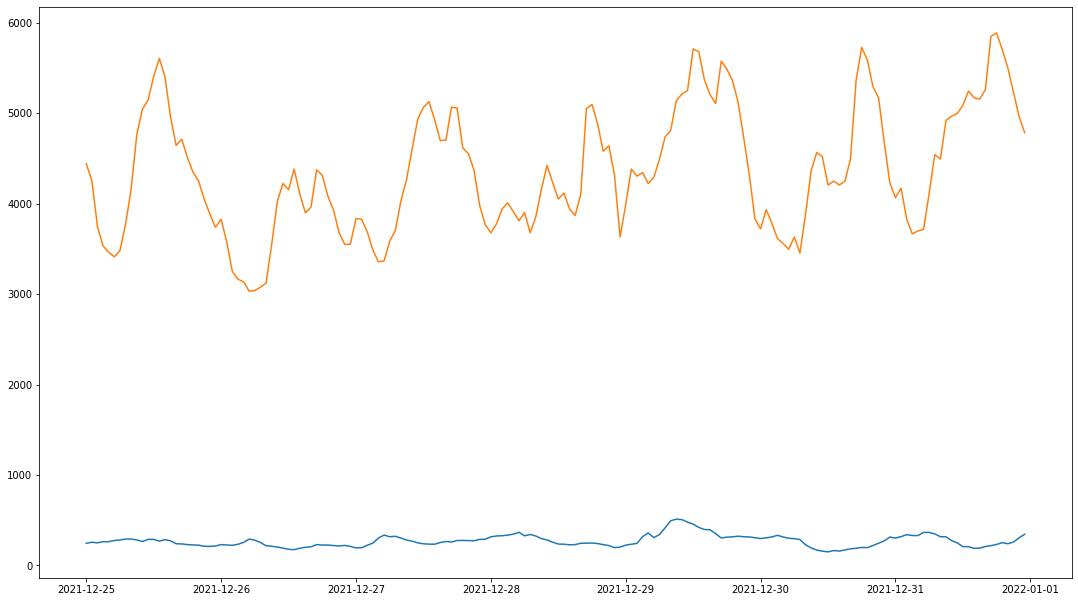

In [62]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.plot(X_valid['date2'][-7*24:],y_pred[-7*24:])
plt.plot(X_valid['date2'][-7*24:],y_valid[-7*24:])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

In [63]:
#plt.barh(X_valid1.columns, ann.feature_importances_)

## Muliple hour input Forecasting

Below from https://www.tensorflow.org/tutorials/structured_data/time_series

In [64]:
import IPython
import IPython.display

In [65]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=0,
                     label_columns=['ActualGenerationMW'])
w2

Total window size: 6
Input indices: [0 1 2 3 4 5]
Label indices: [5]
Label column name(s): ['ActualGenerationMW']

In [66]:


# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df3[:w2.total_window_size]),
                           np.array(train_df3[100:100+w2.total_window_size]),
                           np.array(train_df3[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 6, 8)
Inputs shape: (3, 6, 8)
Labels shape: (3, 1, 1)


In [67]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=0,
    label_columns=['ActualGenerationMW'])

conv_window

Total window size: 3
Input indices: [0 1 2]
Label indices: [2]
Label column name(s): ['ActualGenerationMW']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

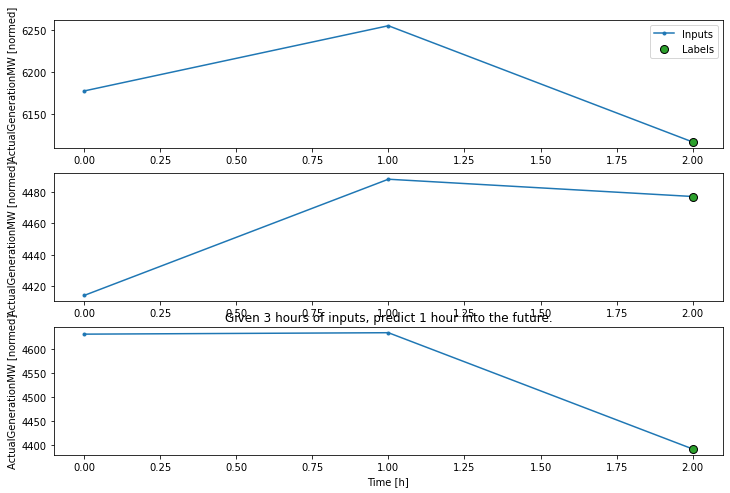

In [68]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [69]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

### Multi-step dense model

In [70]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [71]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

210/210 [==============================] - 1s 5ms/step - loss: 1.3221 - mean_absolute_error: 1.0744


### conv_model

In [72]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,kernel_size=(CONV_WIDTH,),activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [73]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

210/210 [==============================] - 1s 5ms/step - loss: 3.4567 - mean_absolute_error: 1.8052


In [74]:
conv_window.train

<MapDataset element_spec=(TensorSpec(shape=(None, 3, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

In [75]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
  print(window.train)
  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [98]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df3, val_df=val_df3, test_df=test_df3,
               label_columns=None):
    # Store the raw data.
    self.train_df3 = train_df3
    self.val_df3 = val_df3
    self.test_df3 = test_df3

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df3.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]
    print("self.input_indices are given by ",self.input_indices)
    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

##----------------------->
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=0,
    shift=0,
    label_columns=['ActualGenerationMW'])

conv_window

##----------------------->

@property
def train(self):
  return self.make_dataset(self.train_df3)


@property
def trainX(self):
  return self.make_dataset(self.train_df3X)

@property
def trainY(self):
  return self.make_dataset(self.train_df3Y)


@property
def val(self):
  return self.make_dataset(self.val_df3)

@property
def valX(self):
  return self.make_dataset(self.val_df3X)

@property
def valY(self):
  return self.make_dataset(self.val_df3Y)

@property
def test(self):
  return self.make_dataset(self.test_df3)

@property
def testX(self):
  return self.make_dataset(self.test_df3X)

@property
def testY(self):
  return self.make_dataset(self.test_df3Y)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train

WindowGenerator.val = val


WindowGenerator.test = test



WindowGenerator.example = example
###================================>

def split_window(self, features):
    print("self.input_slice is ",self.input_slice)
    print("self.labels_slice is ",self.labels_slice)
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    print("labels are given by", labels)
    print("inputs are given by", inputs)

    '''if self.label_columns is not None:
        labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)'''

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    print("labels are now given by", labels)
    print("inputs are now given by", inputs)
    return inputs, labels

WindowGenerator.split_window = split_window

###================================>

def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    print("Data is  given by",data.shape)
    
    inputData=data[:,:7]
    targets=data[:,7:]
    print("Input data is given by", inputData.shape)
    print("targets are given by",targets.shape)

    ds = tf.keras.utils.timeseries_dataset_from_array(
        inputData,
        targets,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        batch_size=32,)
    print("ds is given by ",ds)
    #ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

###================================>

MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
  print(window.train)
  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

###================================>

conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,kernel_size=(CONV_WIDTH-1,),activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])
###================================>

history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Data is  given by (6693, 8)
Input data is given by (6693, 7)
targets are given by (6693, 1)
ds is given by  <BatchDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
210/210 [==============================] - 2s 8ms/step - loss: 554779.4375 - mean_absolute_error: 608.7838
Data is  given by (3623, 8)
Input data is given by (3623, 7)
targets are given by (3623, 1)
ds is given by  <BatchDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


#### Generating basic plots

In [99]:
conv_window.val

Data is  given by (6693, 8)
Input data is given by (6693, 7)
targets are given by (6693, 1)
ds is given by  <BatchDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


<BatchDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [100]:
y_predAr=conv_model.predict(conv_window.val)
y_pred=y_predAr[:,0]

Data is  given by (6693, 8)
Input data is given by (6693, 7)
targets are given by (6693, 1)
ds is given by  <BatchDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
210/210 [==============================] - 2s 8ms/step


In [105]:
val_df3.columns

Index(['sin_day', 'sin_hour', 'cos_day', 'cos_hour', 'dub_wddir', 'dub_wdsp',
       'dub_temp', 'ActualGenerationMW'],
      dtype='object')

In [101]:
y_valid=val_df3['ActualGenerationMW']

In [ ]:
## Below really doesn't look good, could dates be out of line?

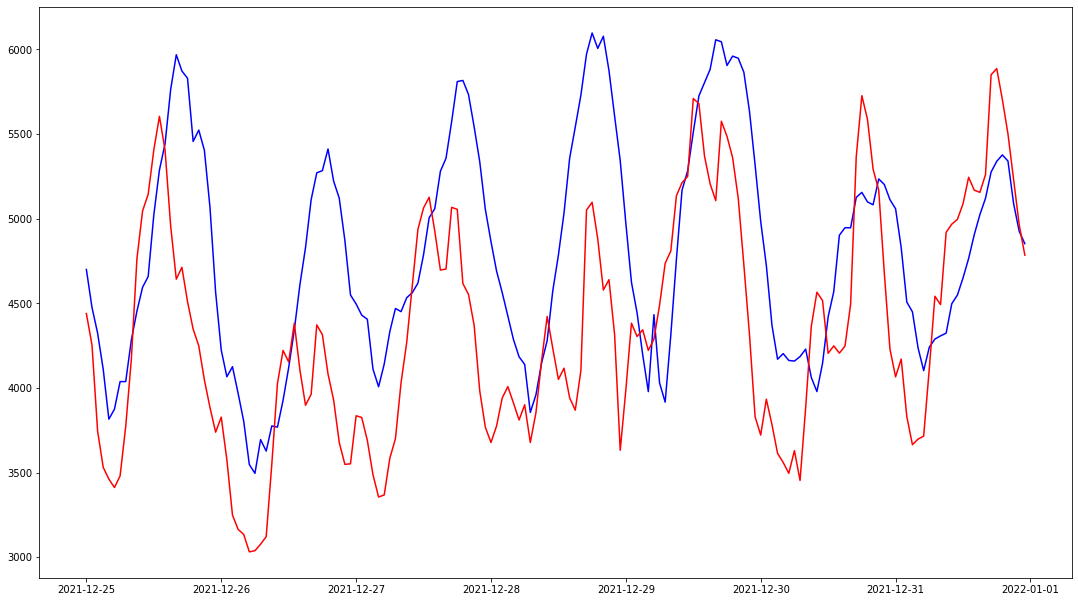

In [102]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

plt.plot(X_valid['date2'][-7*24:],y_pred[-7*24:],color = 'blue')
plt.plot(X_valid['date2'][-7*24:],y_valid[-7*24:],color = 'red')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

In [103]:
conv_model.save('models/conv_model')

INFO:tensorflow:Assets written to: models/conv_model/assets


INFO:tensorflow:Assets written to: models/conv_model/assets


#### Can I get a Hell yeah
_Helia_

self.input_indices are given by  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Data is  given by (20032, 8)
Input data is given by (20032, 7)
targets are given by (20032, 1)
ds is given by  <BatchDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


2022-07-16 10:22:36.824799: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at strided_slice_op.cc:102 : INVALID_ARGUMENT: slice index 7 of dimension 2 out of bounds.


InvalidArgumentError: slice index 7 of dimension 2 out of bounds. [Op:StridedSlice] name: strided_slice/

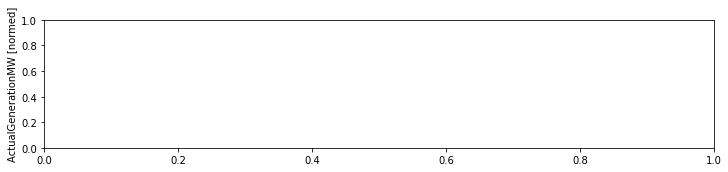

In [78]:
def plot(self, model=None, plot_col='ActualGenerationMW', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot



LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['ActualGenerationMW'])

wide_conv_window

wide_conv_window.plot(conv_model)

In [ ]:
adsf;ligb

In [ ]:
train_df3X=train_df3.drop(['ActualGenerationMW'],1)
train_df3Y=train_df3[['ActualGenerationMW']]
val_df3X=val_df3.drop(['ActualGenerationMW'],1)
val_df3Y=val_df3[['ActualGenerationMW']]
test_df3X=test_df3.drop(['ActualGenerationMW'],1)
test_df3Y=test_df3[['ActualGenerationMW']]


class WindowGenerator2():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df3 = train_df3
    self.train_df3X = train_df3X
    self.train_df3Y = train_df3Y
    self.val_df3 = val_df3
    self.val_df3X = val_df3X
    self.val_df3Y = val_df3Y
    self.test_df3 = test_df3
    self.test_df3X = test_df3X
    self.test_df3Y = test_df3Y

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df3.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    print("The input_width is given by",self.input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]
    print("The label_width is given by",self.label_width)
    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

#======================================
CONV_WIDTH = 2
conv_window = WindowGenerator2(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=0)#,
    #label_columns=['ActualGenerationMW'])

conv_window

#=====================================

@property
def train(self):
  return self.make_dataset(self.train_df3)


@property
def trainX(self):
  return self.make_dataset(self.train_df3X)

@property
def trainY(self):
  return self.make_dataset(self.train_df3Y)


@property
def val(self):
  return self.make_dataset(self.val_df3)

@property
def valX(self):
  return self.make_dataset(self.val_df3X)

@property
def valY(self):
  return self.make_dataset(self.val_df3Y)

@property
def test(self):
  return self.make_dataset(self.test_df3)

@property
def testX(self):
  return self.make_dataset(self.test_df3X)

@property
def testY(self):
  return self.make_dataset(self.test_df3Y)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator2.train = train
WindowGenerator2.trainX = trainX
WindowGenerator2.trainY = trainY

WindowGenerator2.val = val
WindowGenerator2.valX = valX
WindowGenerator2.valY = valY

WindowGenerator2.test = test
WindowGenerator2.testX = testX
WindowGenerator2.testY = testY


WindowGenerator2.example = example

#=====================================
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  print("The label columns are given by",self.label_columns)
  print("The inputs are given by",self.labels_slice)
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator2.split_window = split_window
#=====================================
##New version shown below
'''
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  print("Data is given by",data)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=['ActualGenerationMW'],
      sequence_length=self.total_window_size,
      sequence_stride=0,
      shuffle=False,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

def make_dataset(self, data):
    X = data.drop(['ActualGenerationMW'])
    Y = data[['ActualGenerationMW']]
    data = np.array(data, dtype=np.float32)
    print("Data is given by",data)
    inputDataset = tf.keras.utils.timeseries_dataset_from_array(
      data=X,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=False,
      batch_size=32,)

    outputDatset = tf.keras.utils.timeseries_dataset_from_array(
      data=Y,
      targets=['ActualGenerationMW'],
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=False,
      batch_size=32,)

    inputDataset = inputDataset.map(self.split_window)
    outputDataset = outputDataset.map(self.split_window)

    return inputDataset,outputDataset
'''
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    print("Data is given by",data)
    inputDataset = tf.keras.utils.timeseries_dataset_from_array(
        data,
        None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        batch_size=32)

    inputDataset = inputDataset.map(self.split_window)
    print("Oh Bb")
    return inputDataset
    
WindowGenerator2.make_dataset = make_dataset
#=====================================



MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
    print("Made it here!")
    print("The input data is ",window.trainX)
    print("And then I got here!")
    print("The output data is ",window.trainY)
    history = model.fit(window.trainX,window.trainY, epochs=MAX_EPOCHS,
                      validation_data=(window.valX,window.valY),
                      callbacks=[early_stopping])
    return history

#==========================
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
#val_performance['Conv'] = conv_model.evaluate(conv_window.val)
#performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

In [ ]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['ActualGenerationMW'])

wide_conv_window

wide_conv_window.plot(conv_model)

### Transforming new data for the model

In [ ]:
train_df3

In [ ]:
1

### Saving the model in a directory

In [ ]:
conv_model.save('models/conv_model')